Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :
1. Imputasi missing value dengan mean, median, dan modus
2. Cek korelasi antar variabel dengan heatmap
3. Lakukan imbalance handling dengan undersampling
4. Lakukan scaling dengan robust scaler dan minmax

Pertama, saya akan meload data dan melihat bagaimana karakteristik data yang akan saya gunakan yaitu data diabetes. Dimana terdapat 9 kolom diantaranya Pregnancies, Glucose, BlookPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan OutCome.

In [2]:
import pandas as pd
import numpy as np

# Memuat dataset diabetes
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.00,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.00,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.00,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.00,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,171.00,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.34,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,245.00,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,NaN,47.0,1


Sebelum melakukan pengolahan Data, saya ingin melihat seberapa besar persentase dari Missing Value setiap kolom. Apabila missing valuenya berlebih atau sekitar 50 ke atas, maka saya akan membuang kolom tersebut karena hasil analisisnya tidak akan optimal. Jika kurang dari itu, saya akan mengambil keputusan sesuai dengan karakteristik data.

In [3]:
# Menghitung persentase missing value per kolom dan membatasi hingga 2 angka di belakang koma
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage = missing_values_percentage.round(2)

# Menampilkan hasil
print("\nPersentase missing value per kolom (dengan 2 angka di belakang koma):")
missing_values_percentage


Persentase missing value per kolom (dengan 2 angka di belakang koma):


,0
Pregnancies,10.03
Glucose,14.97
BloodPressure,20.05
SkinThickness,4.95
Insulin,25.00
BMI,29.95
DiabetesPedigreeFunction,10.03
Age,20.05
Outcome,0.00


Dari eksekusi kode di atas, diketahui bahwa kolom outcome memiliki persentase missing value sebesar 0% dalam artian tidak ada missing value pada kolom tersebut. Maka jika kita melihat info dari data, maka jumlah data pada kolom Outcome akan menjadi jumlah data tertinggi.

In [4]:
# Menampilkan informasi awal tentang data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None


Setelah mengeksekusi kode df.info maka diketahui keseluruhan data harusnya berjumlah 768. Kolom lainnya yang belum berjumlah 768 maka masih memiliki missing value yang dimana missing value ini dapat digantikan dengan nilai mean, median, atau modus (statistika deskriptif).

**SOAL NOMOR 1**

Pada soal pertama ini, saya ditugaskan untuk memasukkan statistika deskriptif ke dalam missing value dari setiap kolom. Maka langkah yang harus saya lakukan adalah melihat kolom-kolom yang numerik sehingga kolom-kolom yang sudah terdeteksi ini dapat saya cari Missing Valuenya. Dengan menggunakan fillna saya dapat mengambil missing value lalu menggantinya dengan nilai mean, median, dan modus.

In [5]:
# 1. Imputasi missing value dengan mean, median, dan modus
# Mengidentifikasi kolom numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Mengganti missing value dengan mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Memeriksa apakah masih ada missing values setelah imputasi
missing_values_count = df.isnull().sum()

# Menampilkan jumlah missing value setelah imputasi
print("\nJumlah missing value setelah imputasi:")
print(missing_values_count)

# Simpan hasil imputasi dalam variabel baru
data_diabetes = df.copy()


Jumlah missing value setelah imputasi:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


*Setelah melakukan penggantian missing value dengan nilai mean maka dapat dilihat bahwa jumlah missing value setelah di sum sebesar 0 pada setiap kolom.*

In [6]:
# Mengganti missing value dengan median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Memeriksa apakah masih ada missing values setelah imputasi
missing_values_count = df.isnull().sum()

# Menampilkan jumlah missing value setelah imputasi
print("\nJumlah missing value setelah imputasi:")
print(missing_values_count)

# Simpan hasil imputasi dalam variabel baru
data_diabetes = df.copy()


Jumlah missing value setelah imputasi:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


*Setelah melakukan penggantian missing value dengan nilai median maka dapat dilihat bahwa jumlah missing value setelah di sum sebesar 0 pada setiap kolom.*

**Penggunaan Modus**

*Dalam pencarian modus, dapat menggunaan mode() untuk melihat nilai yang paling sering muncul dalam list/tipe data lainnya. Jika ternyata dalam sebuah kolom terdapat dua atau lebih modus, maka iloc akan berperan untuk mengambil data pada indeks 0*

In [7]:
# Mengganti missing value dengan modus untuk semua kolom
mode_values = df.mode().iloc[0]
df = df.fillna(mode_values)

# Memeriksa dan menampilkan missing values
missing_values_count = df.isnull().sum()
print("\nJumlah missing value setelah imputasi dengan modus:")
print(missing_values_count)

# Simpan hasil imputasi dalam variabel baru
data_diabetes = df.copy()


Jumlah missing value setelah imputasi dengan modus:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


*Setelah melakukan penggantian missing value dengan nilai modus maka dapat dilihat bahwa jumlah missing value setelah di sum sebesar 0 pada setiap kolom.*

In [8]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


Setelah melakukan penggantian mean, median, dan modus pada dataframe maka dapat dilihat pada output data_diabetes.info() memiliki jumlah data non-null sebesar 768 data yang sesuai dengan jumlah maksimal data. Dimana dalam data ini nilai NaN telah diganti dengan Modus karena pergantian terakhir dilakukan dengan memasukkan nilai Modus.

In [9]:
data_diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,120.462481,72.000000,35.0,0.000000,31.99368,627.000000,33.166124,1
1,1.000000,85.000000,66.000000,29.0,0.000000,31.99368,351.000000,31.000000,0
2,8.000000,183.000000,64.000000,0.0,0.000000,23.30000,672.000000,32.000000,1
3,1.000000,89.000000,66.000000,23.0,94.000000,28.10000,167.000000,21.000000,0
4,0.000000,120.462481,40.000000,35.0,168.000000,43.10000,352.519614,33.000000,1
5,5.000000,116.000000,74.000000,0.0,76.878472,25.60000,201.000000,30.000000,0
6,3.000000,78.000000,50.000000,32.0,88.000000,31.99368,248.000000,26.000000,1
7,10.000000,115.000000,68.959283,0.0,0.000000,35.30000,352.519614,29.000000,0
8,3.803184,197.000000,70.000000,45.0,543.000000,30.50000,158.000000,53.000000,1
9,8.000000,125.000000,96.000000,0.0,0.000000,0.00000,232.000000,54.000000,1


Korelasi antar kolom dapat dilihat dengan menggunakan heatmap. Karena disini saya menggunakan coolwarm maka warna merah akan menunjukkan keterikatan tinggi dari kolom-kolom tersebut, sebaliknya warna biru yang semakin terang menunjukkan kurangnya keterkaitan dari kolom-kolom tersebut.

*NB = Nilai 1 artinya keterikatan yang tinggi, di bawah itu, keterikatannya semakin berkurang.*

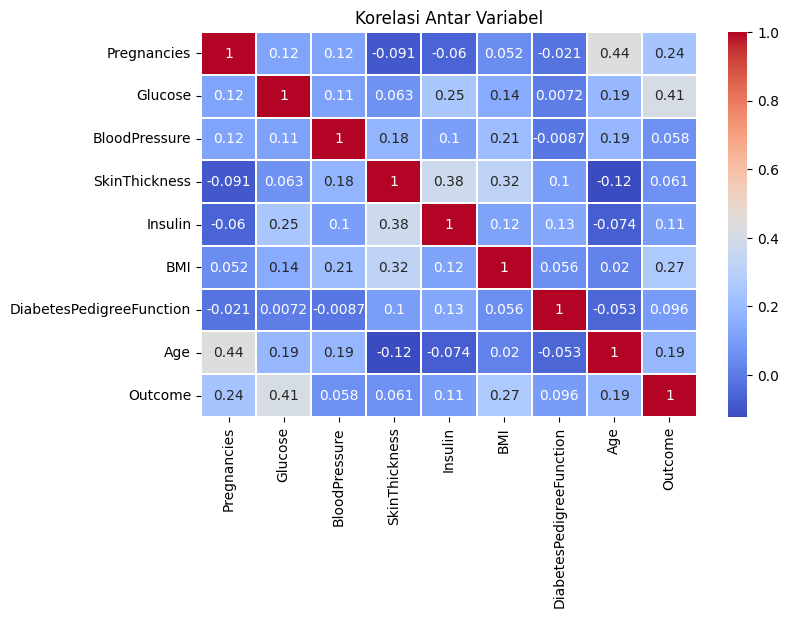

In [13]:
# 2. Cek korelasi antar variabel dengan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Korelasi Antar Variabel')
plt.show()

Sebagai contoh, saya melihat Kolom Pregnancies dengan kolom Glucose memiliki keterikatan/korelasi yang cukup tinggi sebesar 0.12 yang artinya jika satu variabel meningkat, variabel lainnya juga meningkat dengan proporsi yang sama.

**Melakukan Imbalance**

Pada kode di bawah, saya melakukan undersampling untuk menghindari jumlah sampel dari setiap kelas yang kurang seimbang. Oleh karena itu, saya lakukan imbalance dengan undersampling untuk menyeimbangkan jumlah sampel dari kelas outcome yaitu kelas 0 dan 1.


In [14]:
# 3. Lakukan imbalance handling dengan undersampling
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Outcome', axis=1)  # Fitur
y = df['Outcome']  # Target

# Menggunakan RandomUnderSampler untuk menangani imbalance
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print("Distribusi data setelah undersampling:")
y_resampled.value_counts()

Distribusi data setelah undersampling:


,count
Outcome,
0,268
1,268


Berikutnya saya akan melakukan scaling data dengan Robust Scaler dan MinMax Scaler.

In [19]:
# 4. Scaling dengan Robust Scaler dan MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Split data untuk scaling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling dengan Robust Scaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

# Output hasil scaling
print("Data setelah scaling Robust Scaler:")
print(X_train_robust[:3])

Data setelah scaling Robust Scaler:
[[ 1.03936324 -0.24178517  1.08672638  0.28125     0.96910151  0.59230059
   0.02374423  0.        ]
 [-0.36063676  0.38678626  0.08672638 -0.71875    -0.75929355  0.
   0.58475204 -0.84717698]
 [ 0.23936324  0.44392912  1.25339305  0.5625      0.10984225  0.80706569
  -0.17320503  0.15282302]]


In [20]:
# Scaling dengan MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

print("Data setelah scaling MinMax Scaler:")
X_train_minmax[:3]

Data setelah scaling MinMax Scaler:


array([[0.52941176, 0.56565657, 0.71929825, 0.32323232, 0.32228361,
        0.50968703, 0.36410746, 0.24828824],
       [0.11764706, 0.67676768, 0.61403509, 0.        , 0.        ,
        0.47680597, 0.55987189, 0.04081633],
       [0.29411765, 0.68686869, 0.73684211, 0.41414141, 0.16206262,
        0.52160954, 0.29538175, 0.28571429]])